# Importing Librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import *
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import *
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from math import sqrt 

# Importing data

In [2]:
data=pd.read_csv('vols.csv')

In [3]:
data.head() # survey of the data 

,Unnamed: 0,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,CRS_ARR_TIME,CRS_ELAPSED_TIME,DISTANCE,AA,...,NK,EV,OO,UA,VX,WN,risque_or_aeroport,risque_des_aeroport,LATENESS,ARR_DELAY
0,0,1,1,6.0,3,660.0,878.0,158.0,986.0,1,...,0,0,0,0,0,0,76937,34317,0,-6.0
1,1,1,1,7.0,4,660.0,878.0,158.0,986.0,1,...,0,0,0,0,0,0,76937,34317,0,-12.0
2,2,1,1,8.0,5,660.0,878.0,158.0,986.0,1,...,0,0,0,0,0,0,76937,34317,1,7.0
3,3,1,1,9.0,6,660.0,878.0,158.0,986.0,1,...,0,0,0,0,0,0,76937,34317,0,-5.0
4,4,1,1,10.0,7,660.0,878.0,158.0,986.0,1,...,0,0,0,0,0,0,76937,34317,1,113.0


In [4]:
del(data['Unnamed: 0'])

# Predict flight delay

**We will try to define the best model which can predict when the flight can make delay.**

<font color='blue'> <font size=3> ** Splitting data**

We will try to define model, linked the variable LATENESS to the others variables.

In [5]:
indx_train=np.random.choice(len(data),5000) # index of training data 
indx_test=np.arange(len(data))[~indx_train] # index of test data

In [6]:
df=data.values

<font color='blue'><font size=3>**Seperating data**</font>

In [7]:
Xtr=df[indx_train,:-2] #training set on the first ten month
Ytr=df[indx_train,-2]
Xts=df[indx_test,:-2] #training set on the last two month
Yts=df[indx_test,-2]


<font color='blue'><font size=3>**Test differents models**</font>

<font color='green'><font size=2> ** KNeighbors Model ** </font>

In [8]:
lr=KNeighborsClassifier()
params={'n_neighbors':[3,5,7,9,11,13,15]}
gs_kn=GridSearchCV(lr,params,cv=5)
gs_kn.fit(Xtr,Ytr)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [9]:
#The best hyperparametrs of the Knn model
print(gs_kn.best_params_)

{'n_neighbors': 15}


In [10]:
#estimate the performance of the knn model.
ypro=gs_kn.predict_proba(Xts)[:,1]
ypre=gs_kn.predict(Xts)
false_pos,tr_pos,thresh=roc_curve(Yts,ypro)
roc_auc_knn=auc(false_pos,tr_pos)
accuracy_knn=accuracy_score(Yts,ypre)
print('roc_auc={}'.format(roc_auc_knn)),
print('Accuracy={}'.format(accuracy_knn))

roc_auc=0.5517776355146375
Accuracy=0.6274


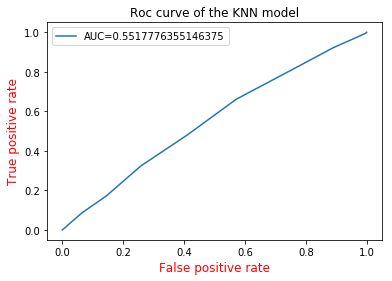

In [11]:
#Visualization of the Roc curve for the KNN model.
plt.plot(false_pos,tr_pos,label='AUC={}'.format(roc_auc_knn))
plt.legend()
plt.xlabel('False positive rate',color='red',fontsize=12)
plt.ylabel('True positive rate',color='red',fontsize=12)
plt.title('Roc curve of the KNN model')
plt.show()

<font color='green'><font size=2>**Logistic Model**</font>

In [12]:
lc=LogisticRegression()
params={'C':np.logspace(-3,3,7),'penalty':['l1','l2']}
gs_lc=GridSearchCV(lc,params,cv=5)
gs_lc.fit(Xtr,Ytr)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [13]:
#The best hyperparametrs of the Logistic model.
print(gs_lc.best_params_)

{'C': 0.01, 'penalty': 'l1'}


In [14]:
#estimate the performance of the logistic model.
ypro=gs_lc.predict_proba(Xts)[:,1]
ypr=gs_lc.predict(Xts)
false_pos,tr_pos,thresh=roc_curve(Yts,ypro)
roc_auc_logistic=auc(false_pos,tr_pos)
accuracy_logistic=accuracy_score(Yts,ypr)
print('roc_auc={}'.format(roc_auc_logistic)),
print('Accuracy={}'.format(accuracy_logistic))

roc_auc=0.5434571310538604
Accuracy=0.6658


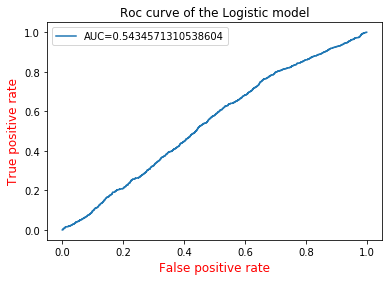

In [15]:
#Visualization of the Roc curve for the Logistic model.
plt.plot(false_pos,tr_pos,label='AUC={}'.format(roc_auc_logistic))
plt.legend()
plt.xlabel('False positive rate',color='red',fontsize=12)
plt.ylabel('True positive rate',color='red',fontsize=12)
plt.title('Roc curve of the Logistic model')
plt.show()

<font color='green'><font size=2> ** SVM Linear Model **</font>

In [16]:
lsvm=LinearSVC()
params={'C':np.logspace(-3,3,10)}
gs_svc=GridSearchCV(lsvm,params,cv=5)
gs_svc.fit(Xtr,Ytr)

GridSearchCV(cv=5, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-03, 4.64159e-03, 2.15443e-02, 1.00000e-01, 4.64159e-01,
       2.15443e+00, 1.00000e+01, 4.64159e+01, 2.15443e+02, 1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [17]:
#The best hyperparametr of the SVM linear model.
print(gs_svc.best_params_)

{'C': 0.001}


In [18]:
#Estimate the performance of the SVM linear model.
ypre=gs_svc.predict(Xts)
accuracy_svm=accuracy_score(Yts,ypre)
print('Accuracy={}'.format(accuracy_svm))

Accuracy=0.4774


<font color='green'> <font size=2> **Selected model** </font> 

**We will select hereunder the best model to predict when the flight could make delay.**

In [19]:
#Performance table for each tested model.
perf_table=pd.DataFrame({'KNN':[roc_auc_knn,accuracy_knn],'Logistic':[roc_auc_logistic,accuracy_logistic],'SVM':['-',accuracy_svm]},index=['roc_auc','Accuracy'])
perf_table

,KNN,Logistic,SVM
roc_auc,0.551778,0.543457,-
Accuracy,0.627400,0.665800,0.4774


<font color='Citron'>**We find that the tested models have a comprables performances.So we will select the Logistic model which has the advantage to be explicit.**</font> 


In [20]:
#We will use our dataset to train the selected model.
lc=LogisticRegression(penalty='l1',C=1000)
lc.fit(Xtr,Ytr)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
# Determinate the coefficients of our model.
coef=lc.coef_
coef

array([[-1.84753004e-01,  7.20018585e-02,  8.08763945e-03,
        -6.18683204e-03, -1.40164379e-04, -5.45300252e-05,
        -3.82310267e-03,  5.10892453e-04,  6.55533829e-02,
        -3.58581225e-01,  5.41446327e-01, -3.67588949e-01,
        -2.60871362e-01,  3.70079841e-01,  4.44348310e-01,
        -1.97958707e-01,  2.74757278e-04, -2.25975761e-01,
        -1.37104763e-01,  1.03621569e-01,  4.35786830e-06,
         7.71042994e-07]])

In [22]:
intercpt=lc.intercept_

In [23]:
#Display coeficient of logistic regression model.
coeficien_log_model=pd.DataFrame({'features':data.columns[:-2],'origin_coef':coef[0]})
coeficien_log_model=pd.concat([pd.DataFrame({'features':'intercpt','origin_coef':intercpt},index=[200]),coeficien_log_model])
coeficien_log_model

,features,origin_coef
200,intercpt,-5.028389e-01
0,QUARTER,-1.847530e-01
1,MONTH,7.200186e-02
2,DAY_OF_MONTH,8.087639e-03
3,DAY_OF_WEEK,-6.186832e-03
4,CRS_DEP_TIME,-1.401644e-04
5,CRS_ARR_TIME,-5.453003e-05
6,CRS_ELAPSED_TIME,-3.823103e-03
7,DISTANCE,5.108925e-04
8,AA,6.555338e-02


$                                   P(LATENESS=1)=\frac{1}{1+\exp({{eq\_lin}})}   $

# Predict delay time 

**We will try to define the best model which can predict the delay time of a flight if it will make delay.**

<font color='blue'><font size=3>**Splitting data**</font>

In [24]:
Ytr=df[indx_train,-1]   # training data labels.
Yts=df[indx_test,-1]  # test data labels.

<font color='blue'><font size=3> ** Test differents models **</font>

<font color='green'><font size=2>** Linear regression model**</font>

In [25]:
lr=LinearRegression()
lr.fit(Xtr,Ytr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
yprd=lr.predict(Xts)

In [27]:
lr_squared_error=sqrt(mean_squared_error(Yts,yprd)) # compute mean squared error.

In [28]:
print('The mean squared error of the linear regression model equal to : {}'.format(lr_squared_error))

The mean squared error of the linear regression model equal to : 38.64505972522755


<font color='green'> <font size=2> ** Ridge Model** </font>

In [29]:
lR=Ridge()
params={'alpha':np.logspace(-3,3,7)}
gs_lR=GridSearchCV(lR,params,cv=10)
gs_lR.fit(Xtr,Ytr)

GridSearchCV(cv=10, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [30]:
#The best hyperparametr of the Ridge Model.
C_ridge=1/gs_lR.best_params_['alpha']
print(gs_lR.best_params_)

{'alpha': 100.0}


In [31]:
yprd=gs_lR.predict(Xts)

In [32]:
lR_squared_error=sqrt(mean_squared_error(Yts,ypr))#compute mean squared error.

In [33]:
print('The mean squared error of the ridge regression equal to :{}'.format(lR_squared_error))

The mean squared error of the ridge regression equal to :38.96938541983951


<font color='green'><font size=2> ** Lasso Model ** </font>

In [34]:
ll=Lasso()
params={'alpha':np.logspace(-3,3,7)}
gs_ll=GridSearchCV(ll,params,cv=10)
gs_ll.fit(Xtr,Ytr)

GridSearchCV(cv=10, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [35]:
#The best hyperparametr of the lasso model.
C_lasso=1/gs_ll.best_params_['alpha']
print(gs_ll.best_params_)

{'alpha': 0.01}


In [36]:
ypr=gs_ll.predict(Xts)

In [37]:
ll_squared_error=sqrt(mean_squared_error(Yts,ypr)) # compute mean squared error.

In [38]:
print('The mean squared error of the Lasso regression equal to :{}'.format(ll_squared_error))

The mean squared error of the Lasso regression equal to :38.64082535227021


<font color='green'><font size=2> ** Selected model ** </font>

**We will select hereunder the best model can predict the delay time of a flight.**

In [39]:
#Performance table for each tested model.
perf_table=pd.DataFrame({'baseline regression model':[lr_squared_error,0],'Ridge model':[lR_squared_error,C_ridge],'Lasso model':[ll_squared_error,C_lasso]},index=['squared_error','C'])
perf_table

,baseline regression model,Ridge model,Lasso model
squared_error,38.64506,38.969385,38.640825
C,0.00000,0.010000,100.000000


<font color='Citron'> ** We find that all models have barely same squared_error.We will opt for Lasso model which has slightly best squared_error and a high coefficient for regularization. We will choice this model to avoid the overfitting of the training data set.**</font>

In [40]:
ll=Lasso(alpha=0.1)
ll.fit(Xtr,Ytr)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [41]:
#determinate the coefficients of the Ridge regression model.
coeficients=ll.coef_
constant=ll.intercept_

In [42]:
coeficients

array([-1.49204355e+00,  5.69096364e-01,  7.25263186e-02, -0.00000000e+00,
       -1.92785683e-03, -8.30615666e-04, -7.06993979e-02,  7.31482979e-03,
        1.49200684e+00, -2.10395064e+00,  6.68364605e+00, -4.83318109e+00,
       -1.02558455e+00, -0.00000000e+00,  6.77508987e+00, -0.00000000e+00,
        1.85155065e-01, -0.00000000e+00,  0.00000000e+00,  1.23029875e-01,
        5.02378509e-05,  2.81849672e-05])

In [43]:
#display the coefficient to respectives features for the baseline model
coef_base_model=pd.DataFrame({'Features':data.columns[:-2],'coef':coeficients})
coef_base_model=pd.concat([coef_base_model,pd.DataFrame({'Features':'intercept','coef':constant},index=[200])])
coef_base_model

,Features,coef
0,QUARTER,-1.492044
1,MONTH,0.569096
2,DAY_OF_MONTH,0.072526
3,DAY_OF_WEEK,-0.000000
4,CRS_DEP_TIME,-0.001928
5,CRS_ARR_TIME,-0.000831
6,CRS_ELAPSED_TIME,-0.070699
7,DISTANCE,0.007315
8,AA,1.492007
9,AS,-2.103951


In [44]:
from numpy import linalg as ln 

In [45]:
r=coeficients

In [47]:
r=np.append(r,constant)

In [48]:
r

array([-1.49204355e+00,  5.69096364e-01,  7.25263186e-02, -0.00000000e+00,
       -1.92785683e-03, -8.30615666e-04, -7.06993979e-02,  7.31482979e-03,
        1.49200684e+00, -2.10395064e+00,  6.68364605e+00, -4.83318109e+00,
       -1.02558455e+00, -0.00000000e+00,  6.77508987e+00, -0.00000000e+00,
        1.85155065e-01, -0.00000000e+00,  0.00000000e+00,  1.23029875e-01,
        5.02378509e-05,  2.81849672e-05,  7.60692056e+00])

In [49]:
ln.norm(r,1)

33.04308190417869